<a href="https://colab.research.google.com/github/matthold86/DeepLearningWPython/blob/main/classify_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Binary Classification Neural Network**

____________________________________

#### **Summary**

This Notebook walks through an example of a sentiment analysis binary classification neural network using Keras built-in IMDB dataset.

The model will be trained to discern between a positive movie review and a negative movie review.

____________________________________

#### **Step 01: Establish Google Drive Connection**
This first step mounts the Colab notebook to the `/DeepLearningWPython` directory on my Google Drive. Any data required for this project will be stored in `/DeepLearningWPython` for its convenient integration with Google Colab.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Github/DeepLearningWPython/

/content/drive/MyDrive/Github/DeepLearningWPython


#### **Step 2: Preparing the Data**

In [3]:
from keras.datasets import imdb
import numpy as np

In [24]:
from keras import models
from keras import layers

In [4]:
# Load the training data and testing data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [5]:
# Retrieve the word index
word_index = imdb.get_word_index()

# Create dictionary that reverses the dictionary word indices: (word, index)
reverse_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)

# Dictionary mapping of word index integers to words via the vocabulary
first_review = " ".join([reverse_index.get(i-3, '?') for i in train_data[0]])


1641221/1641221 [==============================] - 0s 0us/step


In [13]:
def one_hot(documents, vocab_length=10000):
  encoded_documents = np.zeros((len(documents), vocab_length))
  for i in range(len(documents)):
    for ind in documents[i]:
      encoded_documents[i, ind] = 1
  return encoded_documents

In [18]:
# One-Hot encode each *document* - not each word 2D tensor (25000, 10000)
x_train = one_hot(train_data, 10000)
x_test = one_hot(test_data, 10000)

In [21]:
# Vectorize the labels - 1D tensor (25000,)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [36]:
x_validation = x_train[:10000]
y_validation = y_train[:10000]
x_train_final = x_train[10000:]
y_train_final = y_train[10000:]

#### **Step 3: Preparing the Model**

In [34]:
# Define the model with 3 fully connected layers and a binary probability output (sigmoid function)
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [35]:
# Crossentropy compares the sigmoid output probability distribution to the actual binary classification distribution
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#### **Step 4: Train the Model**

The number of epochs is arbitrarily chosen to be 20 at first, but the validation loss and validation accuracy will determine if model begins to overfit to the training data and early stoppage is needed.

In [38]:
history = model.fit(x_train_final,
                    y_train_final,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_validation, y_validation)
                    )

Epoch 1/20
30/30 [==============================] - 2s 67ms/step - loss: 0.1741 - accuracy: 0.9421 - val_loss: 0.2884 - val_accuracy: 0.8830
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1470 - accuracy: 0.9542 - val_loss: 0.2809 - val_accuracy: 0.8885
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1284 - accuracy: 0.9589 - val_loss: 0.2901 - val_accuracy: 0.8863
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1098 - accuracy: 0.9674 - val_loss: 0.3028 - val_accuracy: 0.8836
Epoch 5/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0957 - accuracy: 0.9728 - val_loss: 0.3170 - val_accuracy: 0.8822
Epoch 6/20
30/30 [==============================] - 2s 58ms/step - loss: 0.0822 - accuracy: 0.9777 - val_loss: 0.3456 - val_accuracy: 0.8811
Epoch 7/20
30/30 [==============================] - 2s 55ms/step - loss: 0.0730 - accuracy: 0.9799 - val_loss: 0.3885 - val_accuracy: 0.8728
Epoch 8/20
30

#### **Step 5: Plot the Loss and Accuracy (Training and Validation)**

From the plots below, we see that the training loss continued to decrease with every epoch which is to be expected when using gradient descent optimization. However, the validation loss reached a minimum after 4-6 epochs before rising, indicating the the model overfit the training data starting at the 5th epoch. The validation accuracy also reached a maximum around the 5th epoch reinforcing the overfitting conclusion. The model will be rerun with only 5 epochs in Step 6.

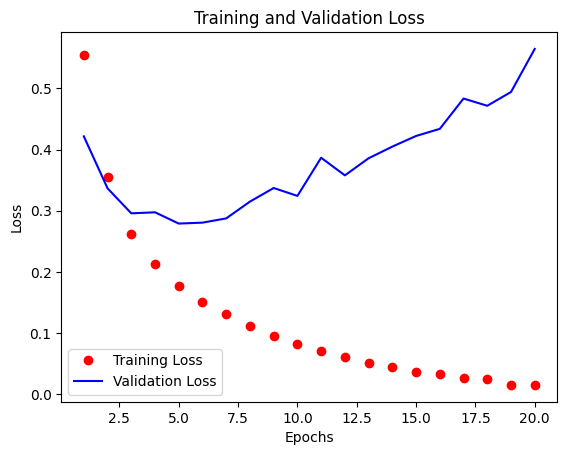

In [30]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, loss_values, 'ro', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

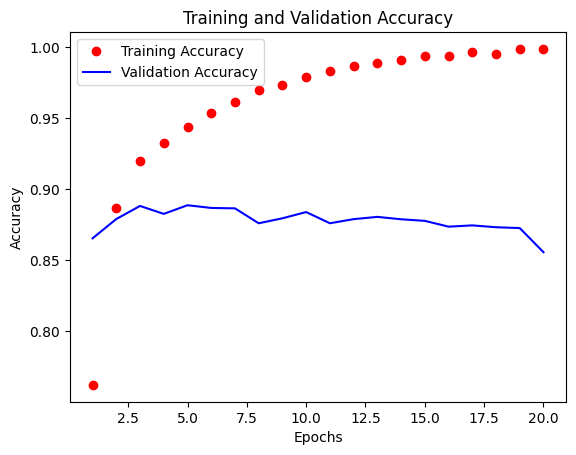

In [32]:
history_dict = history.history
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'ro', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### **Step 6: Modify Model**

After evaluating the validation loss and accuracy the model will be re-created with only 5 epochs

In [39]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

history = model.fit(
    x_train_final,
    y_train_final,
    epochs = 5,
    batch_size = 512,
    validation_data = (x_validation, y_validation)
)

Epoch 1/5
30/30 [==============================] - 10s 267ms/step - loss: 0.5208 - accuracy: 0.7894 - val_loss: 0.3986 - val_accuracy: 0.8639
Epoch 2/5
30/30 [==============================] - 1s 34ms/step - loss: 0.3250 - accuracy: 0.8937 - val_loss: 0.3142 - val_accuracy: 0.8827
Epoch 3/5
30/30 [==============================] - 1s 35ms/step - loss: 0.2456 - accuracy: 0.9169 - val_loss: 0.2999 - val_accuracy: 0.8811
Epoch 4/5
30/30 [==============================] - 1s 50ms/step - loss: 0.2017 - accuracy: 0.9324 - val_loss: 0.2775 - val_accuracy: 0.8884
Epoch 5/5
30/30 [==============================] - 1s 47ms/step - loss: 0.1703 - accuracy: 0.9421 - val_loss: 0.2800 - val_accuracy: 0.8859


In [40]:
# Test model with the testing data - output: [loss, accuracy]
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 3s 4ms/step - loss: 0.2960 - accuracy: 0.8796


[0.29603928327560425, 0.8795999884605408]

In [56]:
# Use the model to predict the likelihood probability for a test sample #9045
test_sample = x_test[9045].reshape(1, x_test.shape[1])
model.predict(test_sample)


1/1 [==============================] - 0s 165ms/step


array([[0.9154963]], dtype=float32)

__________________________________________________
This is the conclusion of a binomial classification neural network using binary crossentropy loss function and gradient descent optimization.